In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from data_helper_functions import load_sector_metadata, extract_ceda_data

In [12]:
data_file_path = "data\Open CEDA by Watershed.xlsx"
metadata_file_path = "data\ceda_metadata.xlsx"

In [14]:
# Extract the CEDA data
ceda_data = extract_ceda_data(data_file_path)

if ceda_data is not None:
    print(f"Successfully extracted CEDA data with shape: {ceda_data.shape}")
    print("\nFirst few rows:")
    print(ceda_data.head())
    
    # Display column names (these might be sector codes)
    print("\nColumn names (potential sector codes):")
    print(ceda_data.columns.tolist()[:20])

Successfully extracted CEDA data with shape: (149, 401)

First few rows:
0               Country    1111A0    1111B0    111200    111300    111400  \
0           Afghanistan  0.832288  1.387533  0.597901  0.547433  0.746834   
1                Angola  0.507764  0.797831  0.378769  0.372152  0.450301   
2               Albania  0.647701  1.070358  0.455569  0.413583  0.578187   
3  United Arab Emirates  0.888452  1.466049  0.633348  0.581714  0.777668   
4             Argentina  0.810486  1.196029  0.565952  0.656380  0.815693   

0    111900    112120    1121A0    112300  ...    813B00    814000    S00500  \
0  1.342802  1.587646  2.108243  0.366549  ...  0.374271  0.283056  0.185664   
1  0.782578  0.920494  1.222898  0.240257  ...  0.322642  0.212441  0.156688   
2  1.045690  1.216085  1.633651  0.286379  ...  0.245527  0.240735  0.135756   
3  1.441345  1.667556  2.199879  0.373118  ...  0.383058  0.285956  0.196644   
4  1.266295  1.683885  2.896392  0.421316  ...  0.176149  0.5162

In [16]:
get_sector_name, get_sector_description = load_sector_metadata(metadata_file_path)

if get_sector_name and get_sector_description:
    print("\n" + "="*80)
    print("SECTOR LOOKUP FUNCTIONS LOADED")
    print("="*80)
    
    # Test the functions with some sector codes
    test_codes = ['1111A0', '1111B0', 'abc']
    
    for code in test_codes:
        print(f"\nTesting sector code: '{code}'")
        
        name = get_sector_name(code)
        if name:
            print(f"  Sector Name: {name}")
            
            # Get description (show first 80 characters)
            desc = get_sector_description(code)
            if desc:
                print(f"  Description (first 80 chars): {desc[:80]}...")
        else:
            print(f"  Sector code '{code}' not found in metadata.")


SECTOR LOOKUP FUNCTIONS LOADED

Testing sector code: '1111A0'
  Sector Name: Oilseed farming
  Description (first 80 chars): This industry comprises establishments primarily engaged in: growing soybeans an...

Testing sector code: '1111B0'
  Sector Name: Grain farming
  Description (first 80 chars): This industry comprises establishments primarily engaged in: growing wheat and/o...

Testing sector code: 'abc'
  Sector code 'abc' not found in metadata.


## Baseline using country / industry mean

BASELINE MODELS COMPARISON - LEAVE-ONE-OUT CROSS VALIDATION
Dataset shape: 149 countries × 400 industries
Total data points: 59600

Method: Country Mean
----------------------------------------
RMSE: 0.868030
R2: 0.081653
MAE: 0.331339
Mean Absolute Percentage Error: 89.93%

Method: Industry Mean
----------------------------------------
RMSE: 0.592255
R2: 0.572482
MAE: 0.240237
Mean Absolute Percentage Error: 47.35%

Method: Combined
----------------------------------------
RMSE: 0.644202
R2: 0.494197
MAE: 0.224970
Mean Absolute Percentage Error: 60.23%
          Method      RMSE        R²       MAE   MAPE (%)
1  Industry Mean  0.592255  0.572482  0.240237  47.352027
2       Combined  0.644202  0.494197  0.224970  60.230667
0   Country Mean  0.868030  0.081653  0.331339  89.930617


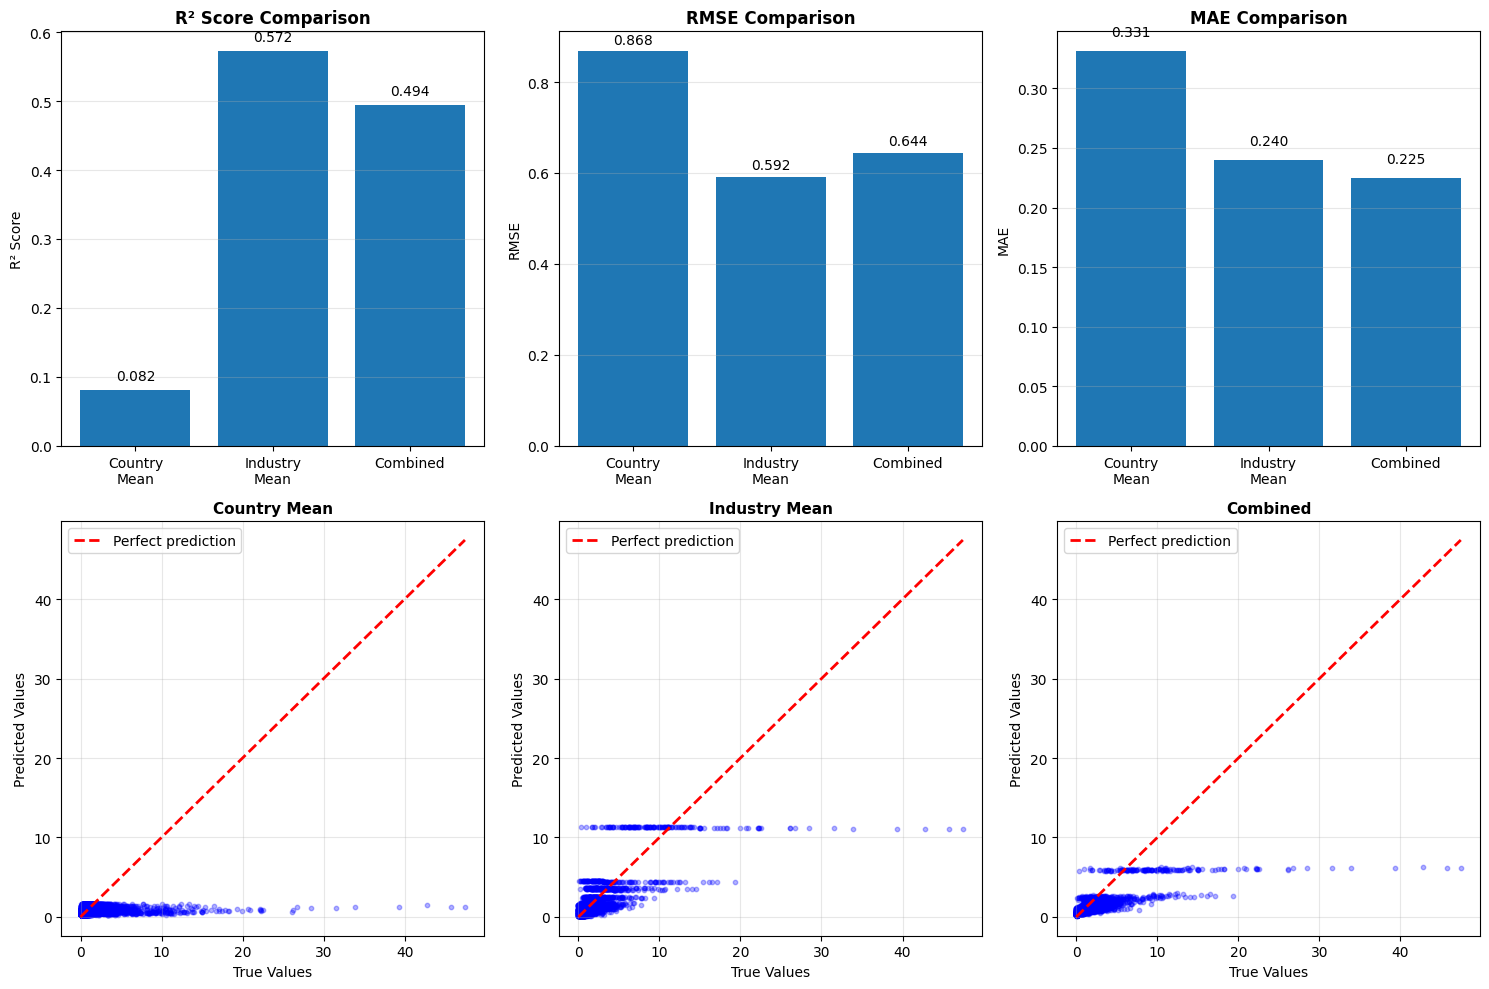

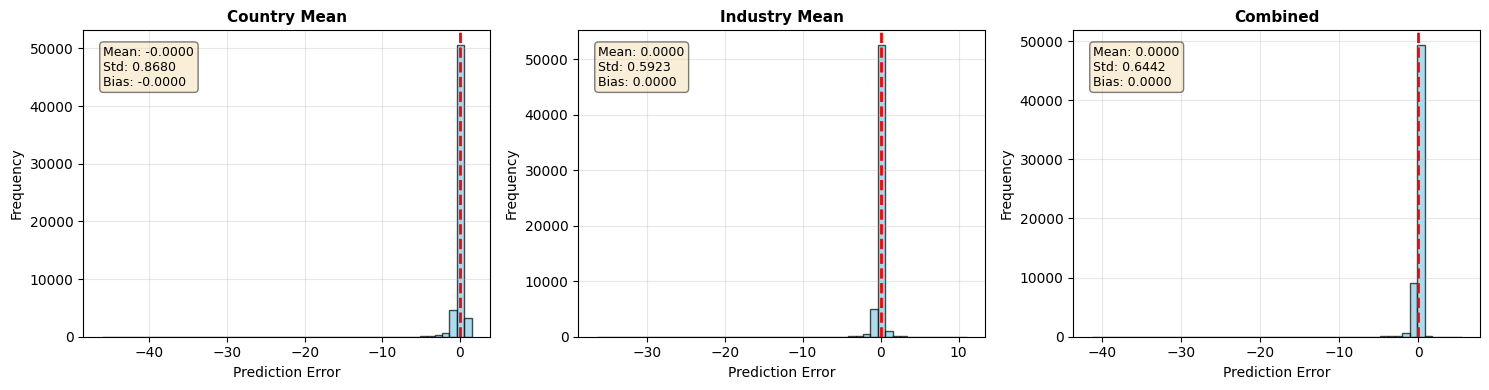

In [18]:
# Re-import the fixed module
import importlib
import function_baseline
importlib.reload(function_baseline)

# Or restart your notebook kernel and run:
from function_baseline import compare_baseline_methods, create_summary_table, visualize_results

# Run analysis
results = compare_baseline_methods(ceda_data)
summary_df = create_summary_table(results)
print(summary_df)

# Visualize
visualize_results(results)

## Collaborative Filtering (k-NN cossim)

In [ ]:
# 1. Import the module
from function_collab_filter_knn import KNNCollaborativeFiltering, run_knn_analysis, find_optimal_k

# 2. Quick analysis with default parameters (k=5)
knn_model, all_results, summary_df = run_knn_analysis(ceda_data, k_neighbors=5, scale_data=True)

# # 3. Find optimal k value
# k_results_df, best_k = find_optimal_k(ceda_data, k_values=[3, 5, 7, 10, 15], approach='country')

# # 4. Re-run with optimal k
# knn_model_optimal = KNNCollaborativeFiltering(k_neighbors=best_k, scale_data=True)
# optimal_results = knn_model_optimal.evaluate_both_approaches(ceda_data)

# # 5. Find similar countries
# similar_countries = knn_model_optimal.find_similar_countries(ceda_data, "United States", top_n=5)

# # 6. Find similar industries
# similar_industries = knn_model_optimal.find_similar_industries(ceda_data, "1111A0", top_n=5)

# # 7. Analyze performance by country
# country_performance = knn_model_optimal.analyze_country_performance(approach='country', top_n=10)

# # 8. Analyze performance by industry
# industry_performance = knn_model_optimal.analyze_industry_performance(approach='country', top_n=10)

# # 9. Export detailed predictions
# detailed_df = knn_model_optimal.export_detailed_predictions(
#     ceda_data, 
#     approach='country', 
#     filename='knn_detailed_predictions.csv'
# )

# # 10. Visualize similarity matrix (first 20 countries)
# knn_model_optimal.visualize_similarity_matrix(approach='country', top_n=20)

# # 11. Get raw results for further analysis
# predictions = knn_model_optimal.results['country']['predictions']
# actuals = knn_model_optimal.results['country']['actuals']
# countries = knn_model_optimal.results['country']['countries']
# industries = knn_model_optimal.results['country']['industries']

# # 12. Calculate additional statistics
# error_distribution = predictions - actuals
# print(f"\nError Statistics:")
# print(f"Mean Error: {np.mean(error_distribution):.6f}")
# print(f"Std Error: {np.std(error_distribution):.6f}")
# print(f"Min Error: {np.min(error_distribution):.6f}")
# print(f"Max Error: {np.max(error_distribution):.6f}")

# # 13. Save model results
# import pickle
# with open('knn_model_results.pkl', 'wb') as f:
#     pickle.dump(knn_model_optimal.results, f)

## Collaborative filtering (SVD)

In [ ]:
# In your Jupyter notebook

# 1. Import the module
from function_collab_filter_svd import SVDImputation, run_svd_analysis

# 2. Assuming you have your data in a DataFrame called 'ceda_data'
# Make sure it has the format: First column 'Country', then industry columns

# 3. Quick analysis with default parameters (5 latent factors)
svd_model, all_results, summary_df = run_svd_analysis(ceda_data, n_factors=5)

# 4. Or use the class directly for more control
svd_model = SVDImputation(n_factors=10, scale_data=True)

# Evaluate country-wise approach
country_results = svd_model.leave_one_out_svd(ceda_data, approach='country')

# Evaluate industry-wise approach  
industry_results = svd_model.leave_one_out_svd(ceda_data, approach='industry')

# 5. Get detailed performance analysis
country_rmse = svd_model.analyze_country_performance(country_results, top_n=10)
industry_rmse = svd_model.analyze_industry_performance(country_results, top_n=10)

# 6. Visualize singular values (helps choose optimal n_factors)
singular_values, cum_variance = svd_model.visualize_singular_values(ceda_data)

# 7. Get summary as DataFrame
summary = svd_model.get_summary_dataframe()
print(summary)

# 8. Access raw results
predictions = svd_model.results['country']['predictions']
actuals = svd_model.results['country']['actuals']

# Create a DataFrame with predictions vs actuals for each data point
results_df = pd.DataFrame({
    'Country': ceda_data['Country'].iloc[svd_model.results['country']['country_indices']].values,
    'Industry': [svd_model.results['country']['industries'][i] 
                 for i in svd_model.results['country']['industry_indices']],
    'Actual': svd_model.results['country']['actuals'],
    'Predicted': svd_model.results['country']['predictions'],
    'Error': svd_model.results['country']['actuals'] - svd_model.results['country']['predictions']
})

print("\nFirst few predictions:")
print(results_df.head())

SVD COLLABORATIVE FILTERING EVALUATION

Evaluating COUNTRY-wise approach
Starting leave-one-out SVD with country-wise approach...
Data shape: 149 countries × 400 industries
Using 5 latent factors


Processing: 100%|██████████| 59600/59600 [02:11<00:00, 451.72it/s]



Results for country-wise SVD:
  RMSE:  0.286484
  R²:    0.899968
  MAE:   0.087811
  MAPE:  61935675463473.367188%

Evaluating INDUSTRY-wise approach
Starting leave-one-out SVD with industry-wise approach...
Data shape: 149 countries × 400 industries
Using 5 latent factors


Processing:   0%|          | 149/59600 [00:00<01:41, 585.45it/s]


IndexError: index 149 is out of bounds for axis 0 with size 149